Task 4: Classification with Logistic Regression

STEP 1 - Choosing a binary classification dataset

In [19]:
#importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix 

# Load the dataset     
bindata = pd.read_csv('data.csv')


STEP 2 - Train/Test Splitting and standardizing the data

In [20]:
bindata.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
bindata.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [22]:
bindata = bindata.drop(columns=['Unnamed: 32', 'id'])

bindata['diagnosis'] = bindata['diagnosis'].map({'M': 1, 'B': 0})

X = bindata.drop(columns=['diagnosis'])
y = bindata['diagnosis']

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardizing the features
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
y_test_scaled = scalar.transform(X_test)    

STEP 3 - Fitting the Logistic Regression model

In [23]:
#creating the logistic regression model
logregmodel = LogisticRegression(random_state=42)

logregmodel.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

STEP 4 - Evaluating the model with confusion matrix,precision, recall, and ROC-AUC score

In [26]:


X_test_scaled = scalar.transform(X_test)
# Predicting the labels for the test set

y_pred = logregmodel.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.9761904761904762
Recall: 0.9534883720930233


ROC-AUC score calculation

In [27]:
from sklearn.metrics import roc_auc_score

y_proba = logregmodel.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.99737962659679


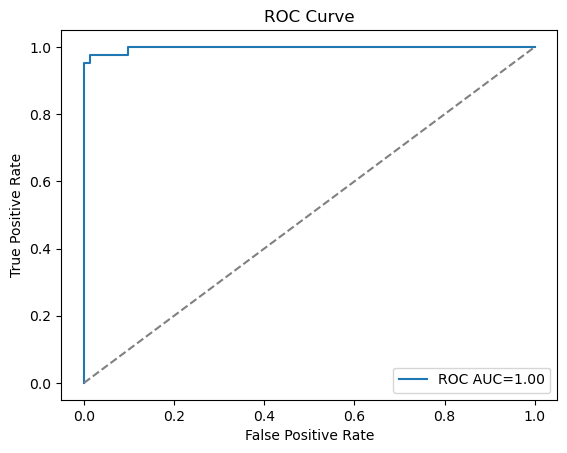

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot
plt.plot(fpr, tpr, label=f'ROC AUC={roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


STEP 5 - Tuning threshold to improve the model's performance

In [28]:
#choosing a threshold for classification
threshold = np.arange(0.0, 1.1, 0.1)

def to_labels(probs, threshold):
    return np.where(probs >= threshold, 1, 0)

from sklearn.metrics import f1_score
scores = [f1_score(y_test, to_labels(y_proba, t)) for t in threshold]

#selecting the threshold with the highest F1 score
best_threshold = threshold[np.argmax(scores)]
print("Best Threshold:", best_threshold)


Best Threshold: 0.4


SIGMOID FUNCTION:
The sigmoid function takes any number and squashes it to a value between 0 and 1, forming an S-shaped curve. It is used to turn outputs into probabilities, so higher input means closer to 1 (yes), and lower input means closer to 0 (no)